<a href="https://colab.research.google.com/github/FedeSanta777/AIFundamentals/blob/main/Copia_di_Homework_Fondamenti_di_IA_AA_2023_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [584]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [585]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [586]:
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset = dataset.sample(frac=1)
dataset_training_4_print = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset = pd.get_dummies(dataset, dtype=int)
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]
print(dataset)

            Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
0     21.098035  1.690437   96.366777  2.000000  2.958330  2.000000  0.000000   
1     24.347414  1.789193   89.393589  1.521604  2.174968  2.000000  0.000000   
2     21.832995  1.580964   65.363941  2.021446  3.000000  1.077917  0.523847   
3     18.525525  1.856633   59.258372  2.592247  3.304123  2.036764  2.038653   
4     18.535075  1.688025   45.000000  3.000000  3.000000  3.000000  2.539762   
...         ...       ...         ...       ...       ...       ...       ...   
2106  19.000000  1.710000   71.000000  3.000000  3.000000  2.000000  1.000000   
2107  16.129279  1.650000   85.583485  2.954996  3.000000  1.000000  2.091862   
2108  23.000000  1.620000   58.000000  2.000000  3.000000  1.000000  1.000000   
2109  20.924808  1.803245  105.686091  2.000000  3.000000  2.290368  0.001086   
2110  19.054938  1.585886   42.541794  2.910345  3.000000  1.000000  1.461005   

           TUE  Gender_Fema

In [587]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
#import warnings
%matplotlib inline


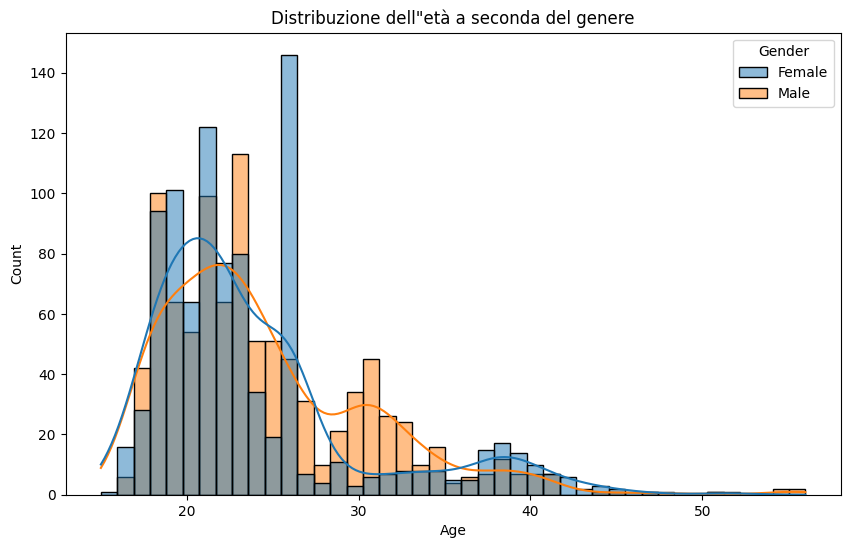

In [588]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training_4_print, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

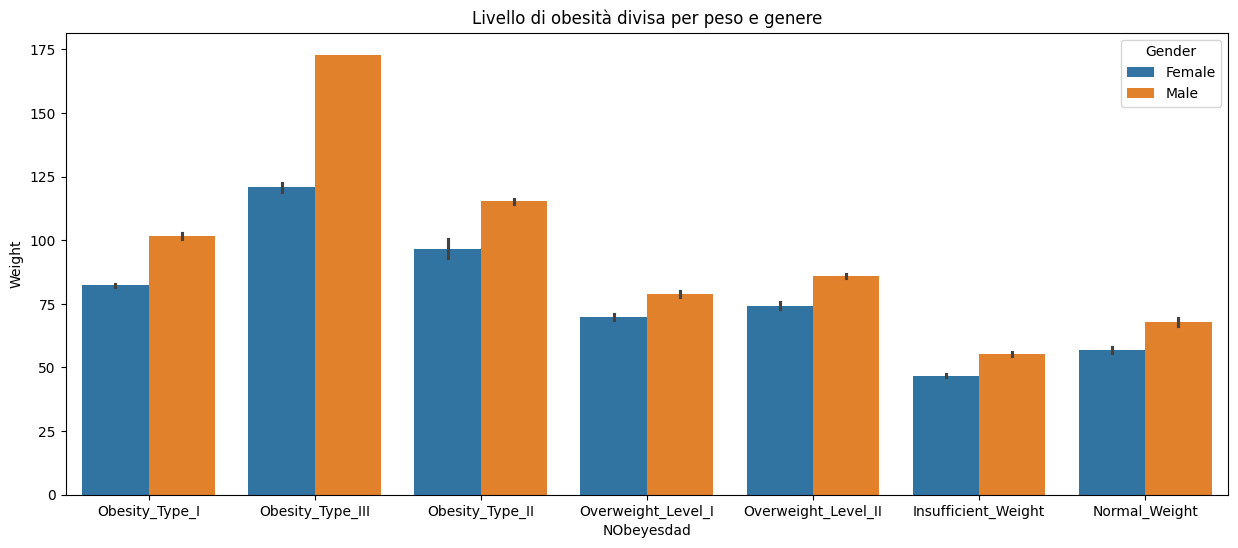

In [589]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training_4_print, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

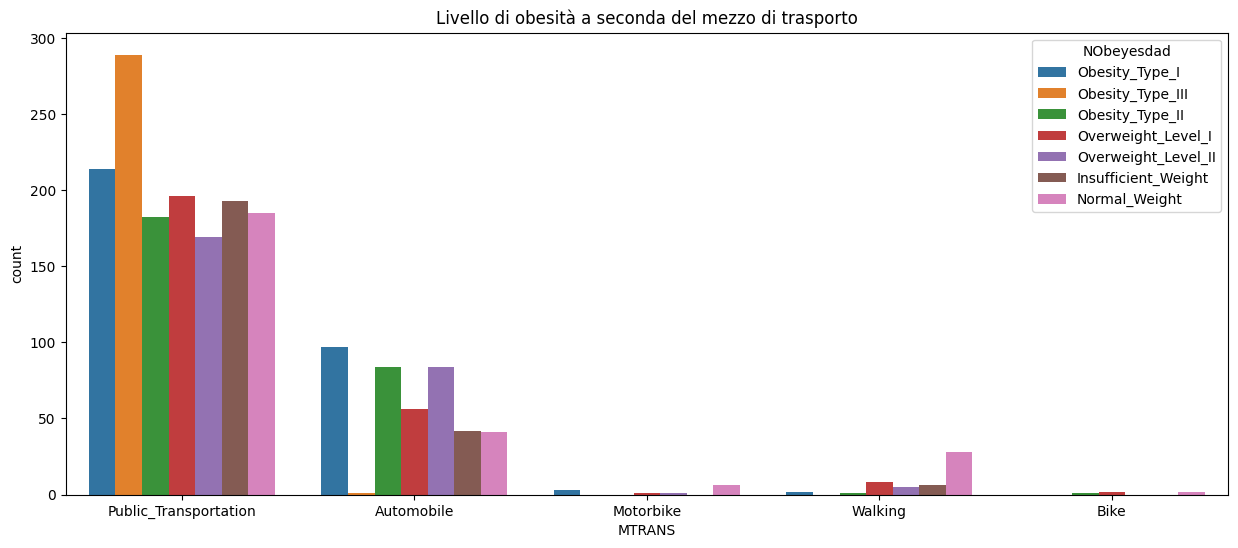

In [590]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training_4_print, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

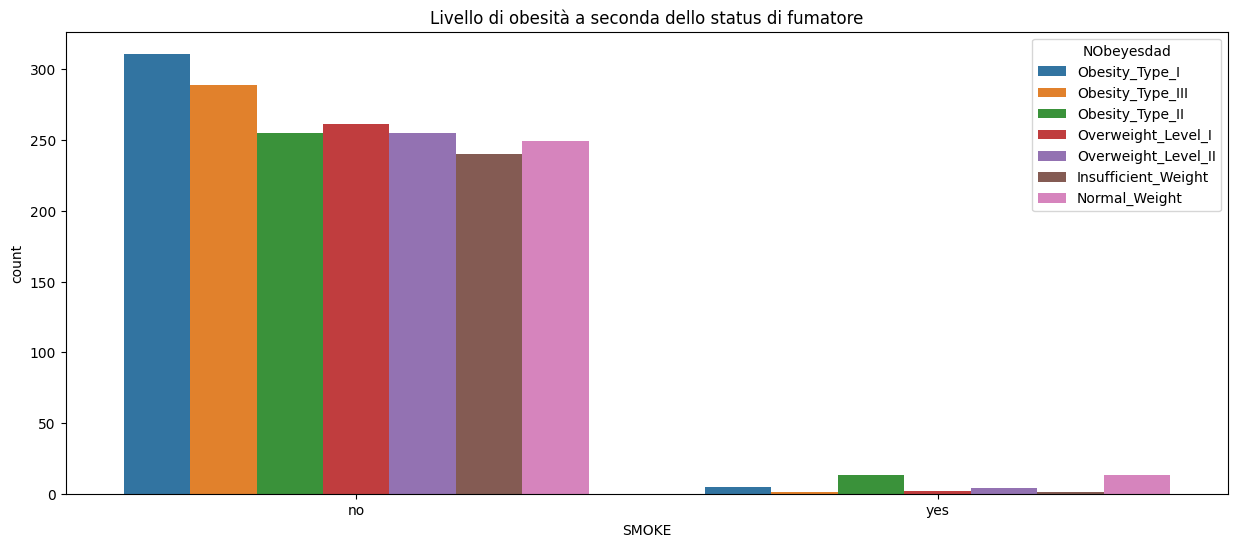

In [591]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training_4_print, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

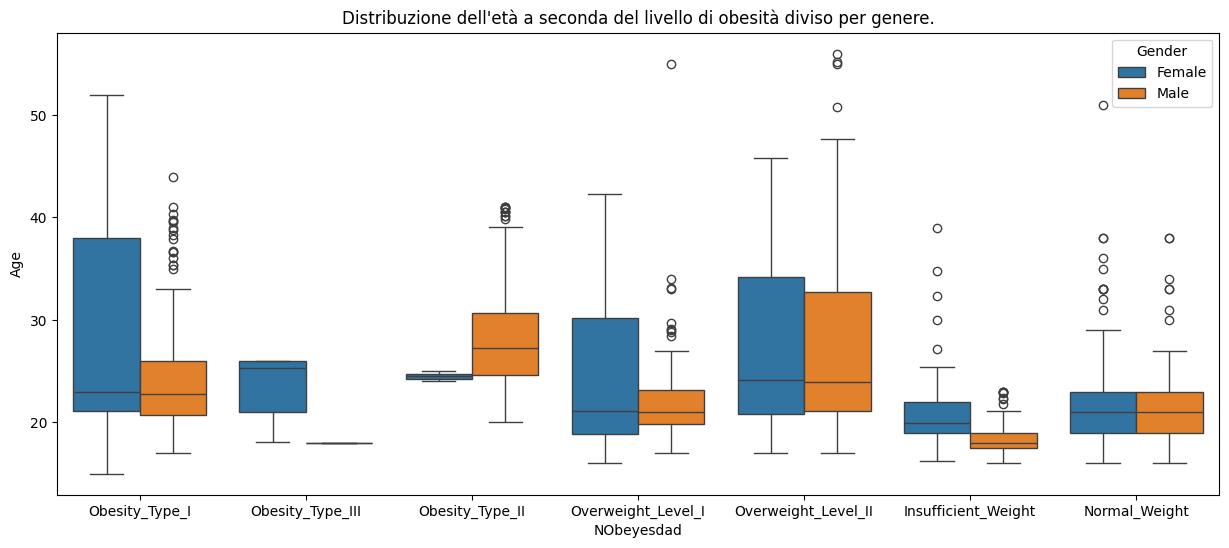

In [592]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training_4_print, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

In [593]:
# Task 1 Homework

import math

# # FASE I: Preparazione del dataset
# # Creo dei dizionari per ogni campo non numerico del dataset con i valori possibili che possono assumere
# gender_map = {
#     "Male": 0, "Female": 1
# }
# yesNo_map = {
#     "yes": 0, "no": 1
# }
# caec_map = {
#     "Always": 0, "Frequently": 1, "no": 2, "Sometimes": 3
# }
# calc_map = {
#     "Always": 0, "Frequently": 1, "no": 3, "Sometimes": 2
# }
# mtrans_map = {
#     "Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4
# }
# # Osservazione: ordinare gli indici in base alla fascia di peso migliora decisamente il risultato del train
# nobeyesdad_map = {
#     "Overweight_Level_I":2 , "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5,
#     "Obesity_Type_III": 6, "Normal_Weight": 1, "Insufficient_Weight": 0
# }

# #warnings.filterwarnings('ignore')

# # Sostituisco tutti i valori dei campi che non hanno un dominio numerico con valori
# # numerici sfruttando i dizionari creati
# dataset_training.Gender.replace(gender_map, inplace=True)
# dataset_training.family_history_with_overweight.replace(yesNo_map, inplace=True)
# dataset_training.FAVC.replace(yesNo_map, inplace=True)
# dataset_training.CAEC.replace(caec_map, inplace=True)
# dataset_training.SMOKE.replace(yesNo_map, inplace=True)
# dataset_training.SCC.replace(yesNo_map, inplace=True)
# dataset_training.CALC.replace(calc_map, inplace=True)
# dataset_training.MTRANS.replace(mtrans_map, inplace=True)
# dataset_training.NObeyesdad.replace(nobeyesdad_map, inplace=True)

# Estraggo il vettore y prendendo la colonna dei pesi (dato da inferire)
yTraining = dataset_training.Weight
yTraining = yTraining.to_numpy()

# Rimuovo il campo pesi dal dataset di training in modo da avere la nostra matrice X
XTraining = dataset_training.drop(["Weight"], axis=1)
XTraining.insert(0, "bias", 1, False)

X = XTraining.to_numpy()
print(X)

# Calcolo c = (XTX)-1XTY

pinv=np.linalg.pinv(X)
print(type(pinv))
print(type(yTraining))
c=pinv@yTraining


# Testo il training Y’ = cTX
yAttesa = dataset_test.Weight
yAttesa = yAttesa.to_numpy()
dataset_test = dataset_test.drop(["Weight"], axis=1)
dataset_test.insert(0, "bias", 1, allow_duplicates=False)
# dataset_test.Gender.replace(gender_map, inplace=True)
# dataset_test.family_history_with_overweight.replace(yesNo_map, inplace=True)
# dataset_test.FAVC.replace(yesNo_map, inplace=True)
# dataset_test.CAEC.replace(caec_map, inplace=True)
# dataset_test.SMOKE.replace(yesNo_map, inplace=True)
# dataset_test.SCC.replace(yesNo_map, inplace=True)
# dataset_test.CALC.replace(calc_map, inplace=True)
# dataset_test.MTRANS.replace(mtrans_map, inplace=True)
# dataset_test.NObeyesdad.replace(nobeyesdad_map, inplace=True)
XTest = dataset_test.to_numpy()

yTest = np.dot(XTest,c)

# Valuto la qualità del training


def MSE(yAttesa, yInferita):
    sum = 0
    scarto = yInferita-yAttesa
    sum = np.dot(scarto,scarto)
    # for i in range(len(yAttesa)):
    #     scarto = yInferita[i]-yAttesa[i]
    #     scarto = math.pow(scarto,2)
    #     sum += scarto
    sum = sum/len(yAttesa)
    return sum

print(MSE(yAttesa,yTest))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, yTraining)

y_pred = model.predict(XTest)

print(MSE(yAttesa,y_pred))


[[ 1.       21.098035  1.690437 ...  0.        0.        0.      ]
 [ 1.       24.347414  1.789193 ...  0.        0.        1.      ]
 [ 1.       21.832995  1.580964 ...  0.        1.        0.      ]
 ...
 [ 1.       22.285024  1.75376  ...  0.        0.        0.      ]
 [ 1.       21.291969  1.8002   ...  1.        0.        0.      ]
 [ 1.       21.478496  1.686936 ...  0.        0.        0.      ]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
19.706574823064727
19.459479890284836
